# Attention Mechanisms in the Transformer Architecture

Attention mechanisms in neural networks, particularly within Transformer architectures, provide a way to capture relationships between elements in a sequence, such as words in a sentence. 

In this example, we explore a model that generates an attention matrix and contextualizes output vectors using random embeddings for demonstration purposes.

In [6]:
from AttentionModel import AttentionModel

model = AttentionModel()

sentence = "The cat sat on the mat"
tokens, attention_matrix, output = model.compute_attention(sentence, 4)

print("Tokens:", tokens)

print("Attention Matrix:")
print(attention_matrix)

print("Output Vectors:")
print(output)


Tokens: ['The', 'cat', 'sat', 'on', 'the', 'mat']
Attention Matrix:
[[0.16464407 0.16229053 0.17270516 0.13420112 0.17108618 0.19507295]
 [0.16142626 0.17306923 0.16385838 0.1259176  0.18007022 0.19565831]
 [0.16334105 0.15580367 0.20087836 0.12321159 0.15127081 0.20549452]
 [0.16424903 0.15493591 0.15944401 0.17510646 0.15232118 0.19394341]
 [0.16395208 0.17348538 0.15327351 0.11926572 0.21119731 0.178826  ]
 [0.16011953 0.16145984 0.17834357 0.13006953 0.15317077 0.21683676]]
Output Vectors:
[[0.59613685 0.71135658 0.5396798  0.63858101]
 [0.58646109 0.71290581 0.54212532 0.6493122 ]
 [0.62337858 0.69869558 0.54697047 0.63692409]
 [0.60177622 0.72257393 0.5135066  0.61114999]
 [0.55820172 0.71723075 0.55143106 0.65882457]
 [0.61732464 0.70839797 0.5368622  0.63939769]]


### Understanding the Example

The input sentence is tokenized into a sequence of six words: "The," "cat," "sat," "on," "the," and "mat." Each token is assigned a random embedding vector of dimension 4 (a simplified representation for illustration; real models use higher dimensions like 512).

The attention model computes:
- An attention matrix that quantifies how much each token attends to every other token.
- Output vectors that represent each token's contextualized embedding, weighted by the attention scores.

These computations use scaled dot-product attention, where embeddings are projected into queries $ \mathbf{Q} $, keys $ \mathbf{K} $, and values $ \mathbf{V} $, followed by similarity scoring and normalization.

#### The Attention Matrix: Quantifying Inter-Token Relationships

The attention matrix is a 6x6 matrix (matching the number of tokens), where each row corresponds to a source token (the one "paying attention"), and each column corresponds to a target token (the one being attended to). Entries are probabilities obtained via a softmax function, ensuring each row sums to approximately 1 (minor discrepancies may arise from rounding or floating-point precision).

The matrix is presented as:

$$
\begin{bmatrix}
0.165 & 0.162 & 0.173 & 0.134 & 0.171 & 0.195 \\
0.161 & 0.173 & 0.164 & 0.126 & 0.180 & 0.196 \\
0.163 & 0.156 & 0.201 & 0.123 & 0.151 & 0.205 \\
0.164 & 0.155 & 0.159 & 0.175 & 0.152 & 0.194 \\
0.164 & 0.173 & 0.153 & 0.119 & 0.211 & 0.179 \\
0.160 & 0.161 & 0.178 & 0.130 & 0.153 & 0.217
\end{bmatrix}
$$

#### Interpreting the Numbers

- **Row-wise Probabilities**: Each row represents the attention distribution for a specific token. For example, the first row (for "The") shows:
  - 0.165 to itself ("The"),
  - 0.162 to "cat,"
  - 0.173 to "sat,"
  - 0.134 to "on,"
  - 0.171 to "the,"
  - 0.195 to "mat."
  This indicates "The" pays the most attention to "mat" (0.195) and the least to "on" (0.134).

- **Diagonal Elements**: These represent self-attention (a token attending to itself). Values like 0.165 (for "The") or 0.211 (for "the") suggest varying degrees of self-focus, influenced by the random embeddings.

- **Off-Diagonal Elements**: These capture cross-attention. For instance, in the fifth row (for "the"), the high value of 0.211 to itself and 0.173 to "cat" might reflect semantic similarities in the embeddings, though in this simplified model, patterns are driven by randomness rather than trained semantics.

- **Overall Patterns**: Higher values indicate stronger contextual relevance. The last row (for "mat") shows elevated attention to "sat" (0.178) and itself (0.217), potentially highlighting positional or embedding-based affinities. Since embeddings are random and weight matrices are identity (not learned), these weights do not reflect real linguistic relationships but demonstrate the mechanism.

#### The Output Vectors: Contextualized Representations

The output vectors form a 6x4 matrix, where each row is the contextualized embedding for a token, computed as the attention-weighted sum of the value vectors $ \mathbf{V} $:

$$
\text{Output} = \mathbf{A} \mathbf{V}
$$

Here, $ \mathbf{A} $ is the attention matrix, and $ \mathbf{V} $ is derived from the original embeddings. The resulting matrix is:

$$
\begin{bmatrix}
0.596 & 0.711 & 0.540 & 0.639 \\
0.586 & 0.713 & 0.542 & 0.649 \\
0.623 & 0.699 & 0.547 & 0.637 \\
0.602 & 0.723 & 0.514 & 0.611 \\
0.558 & 0.717 & 0.551 & 0.659 \\
0.617 & 0.708 & 0.537 & 0.639
\end{bmatrix}
$$

### Interpretation of the Numbers
- **Row-wise Embeddings**: Each row is a 4-dimensional vector for a token, incorporating context from the entire sequence. For example, the first row (for "The") is [0.596, 0.711, 0.540, 0.639], which is a blend of all tokens' embeddings, weighted by the first row of the attention matrix.

- **Dimension-wise Meaning**: Each column represents a feature dimension. Variations across rows (e.g., the second column ranges from 0.699 to 0.723) reflect how attention redistributes information, potentially emphasizing certain semantic aspects.

- **Comparison to Original Embeddings**: In a real model, these outputs would evolve through layers, capturing deeper context. Here, with random inputs, they illustrate aggregation: a token's output is a convex combination of all value vectors, guided by attention probabilities.

## Insights and Limitations

These numbers demonstrate how attention transforms isolated embeddings into context-aware representations, a key strength of Transformers. In trained models, patterns would align with language structures (e.g., nouns attending to verbs). However, this example uses random data and identity weights, so values are illustrative rather than semantically meaningful. 

For deeper analysis, visualizing the matrix as a heatmap or experimenting with trained embeddings can reveal more intuitive patterns.

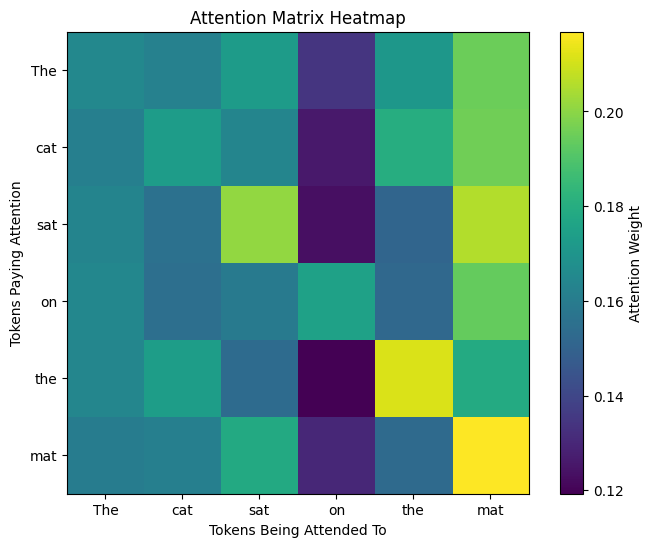

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.imshow(attention_matrix, cmap='viridis')
plt.colorbar(label='Attention Weight')
plt.xticks(ticks=np.arange(len(tokens)), labels=tokens)
plt.yticks(ticks=np.arange(len(tokens)), labels=tokens)
plt.xlabel('Tokens Being Attended To')
plt.ylabel('Tokens Paying Attention')
plt.title('Attention Matrix Heatmap')
plt.show()